In [ ]:
# !pip install SMOTE

In [ ]:
# !pip install imbalanced-learn

In [ ]:
# !pip install -U scikit-learn imbalanced-learn

In [ ]:
# pip install tensorflow

In [ ]:
# pip install xgboost

In [ ]:
# pip install gensim

In [ ]:
# pip install numpy

In [ ]:
# pip install pandas

In [ ]:
# pip install matplotlib

In [ ]:
# pip install transformers

In [ ]:
# pip install nltk

In [ ]:
# import nltk

In [ ]:
# nltk.download('stopwords')

In [ ]:
# nltk.download('punkt')

In [ ]:
# nltk.download('wordnet')

In [ ]:
# pip install gensin

In [51]:
pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 6.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
# import keras.preprocessing.text Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense
from keras.models import Sequential
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
import xgboost as xgb
from gensim.models import KeyedVectors
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MaxAbsScaler
from sklearn.feature_extraction.text import HashingVectorizer
# import spacy
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
from sklearn.preprocessing import Normalizer
from gensim.models import KeyedVectors
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from gensim.models import KeyedVectors
import random
import tensorflow as tf
from nltk import ngrams
import os
import seaborn as sns
import contractions
from nltk import pos_tag
from nltk.corpus import wordnet

/Users/saivunnava/anaconda3/lib/python3.11/site-packages/transformers/utils/generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [ ]:
# import nltk
# nltk.download('averaged_perceptron_tagger')

In [2]:
def reset_random_seeds(SEED=42):
   os.environ['PYTHONHASHSEED']=str(SEED)
   tf.random.set_seed(SEED)
   np.random.seed(SEED)
   random.seed(SEED)
reset_random_seeds(SEED=42)

# Data Exploration and Visualization

In [3]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

In [4]:
train.describe()

,overall
count,370863.000000
mean,4.566600
std,0.930377
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


In [5]:
train.head(20)

,overall,Review
0,5,I love these glitter pens. They sparkle deligh...
1,5,It works well with my machine. I use mostly c...
2,5,"This is a great assortment of colors, though t..."
3,5,Just what I was looking for.
4,5,I make 400 birds for the hospital each month.
5,1,not very sharp
6,5,Its just a replacement blade
7,5,"Great value,"
8,3,It is just okay for me. The plastic is a bit ...
9,5,Always happy when I find a great priced art gi...


In [6]:
train.shape

(370863, 2)

In [7]:
train.isnull().sum()

overall    0
Review     8
dtype: int64

In [8]:
train.isnull().sum()

overall    0
Review     8
dtype: int64

In [9]:
train.duplicated().sum()

93449

In [10]:
train = train.drop_duplicates()

In [11]:
train.shape

(277414, 2)

In [12]:
train["Review"]= train["Review"].astype(str)

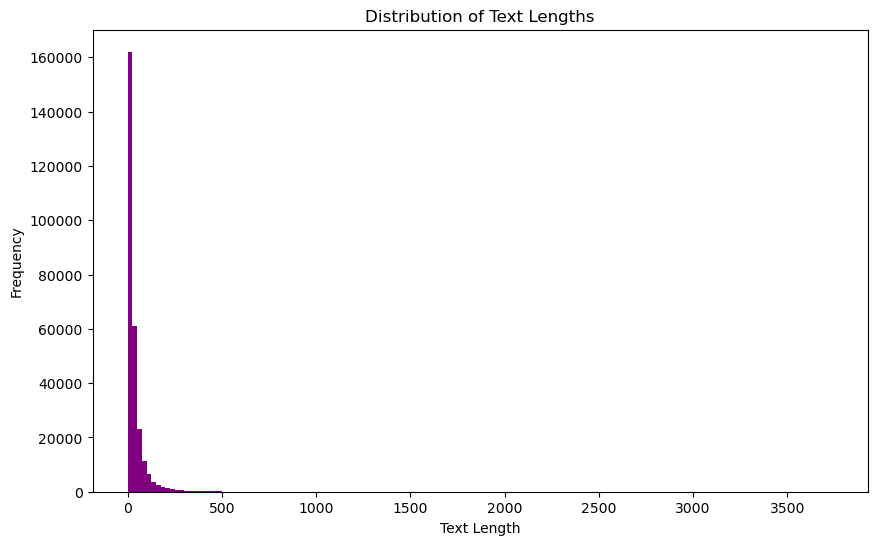

In [13]:
train['text_length'] = train['Review'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
plt.hist(train['text_length'], bins=150, color='purple')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

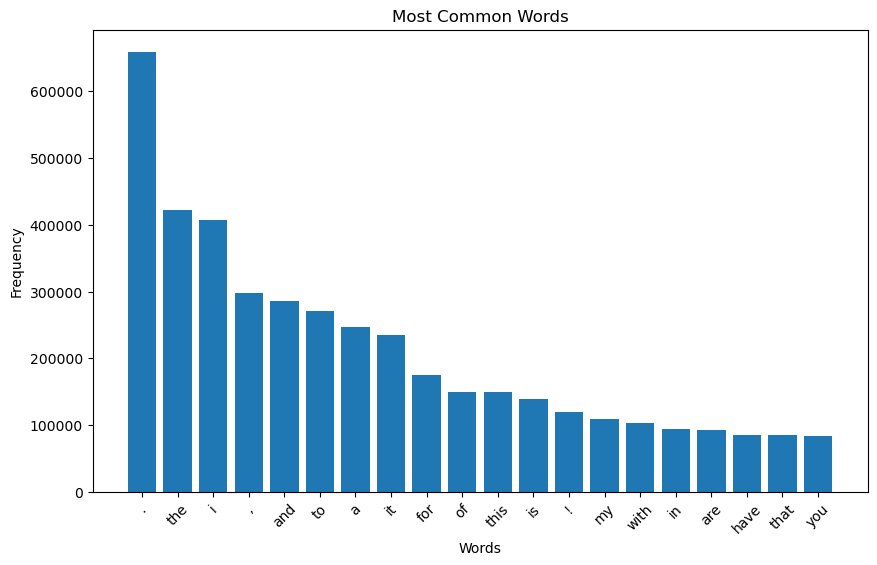

In [14]:
word_counts = [word for text in train['Review'] for word in word_tokenize(text.lower())]
word_counts = Counter(word_counts)
most_common_words = word_counts.most_common(20)
plt.figure(figsize=(10, 6))
plt.bar(*zip(*most_common_words))
plt.title('Most Common Words')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

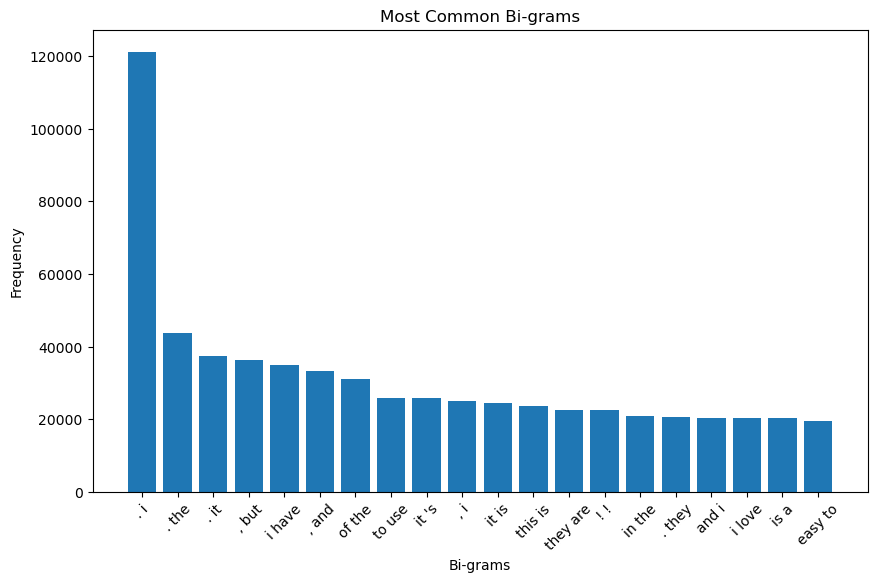

In [15]:
def generate_ngrams(text, n=2):
    words = word_tokenize(text.lower())
    ngrams_list = [' '.join(grams) for grams in ngrams(words, n)]
    return ngrams_list

bigrams = [bigram for text in train['Review'] for bigram in generate_ngrams(text, n=2)]
bigram_count = Counter(bigrams).most_common(20)

plt.figure(figsize=(10, 6))
plt.bar(*zip(*bigram_count))
plt.title('Most Common Bi-grams')
plt.xticks(rotation=45)
plt.xlabel('Bi-grams')
plt.ylabel('Frequency')
plt.show()

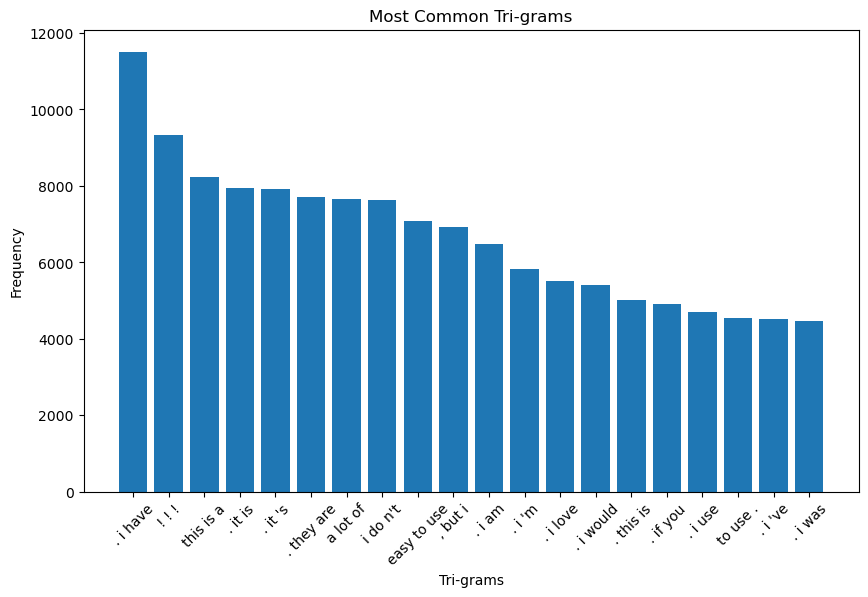

In [16]:
trigrams = [trigram for text in train['Review'] for trigram in generate_ngrams(text, n=3)]
trigram_count = Counter(trigrams).most_common(20)

plt.figure(figsize=(10, 6))
plt.bar(*zip(*trigram_count))
plt.title('Most Common Tri-grams')
plt.xticks(rotation=45)
plt.xlabel('Tri-grams')
plt.ylabel('Frequency')
plt.show()

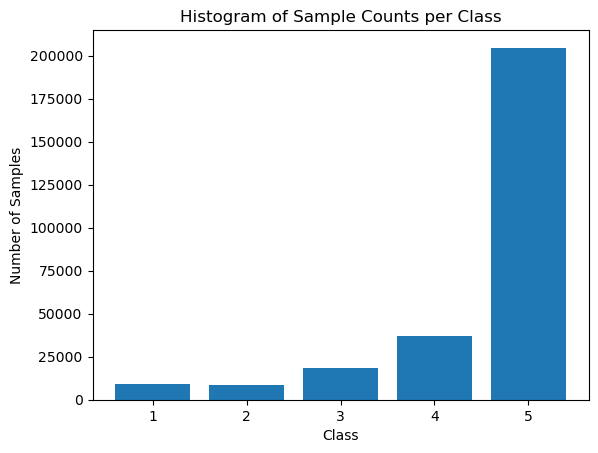

In [17]:
class_counts = train['overall'].value_counts()

plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Histogram of Sample Counts per Class')
plt.show()

In [ ]:
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='overall', y='Review', data=train)
# plt.title('Text Length Distribution by Label')
# plt.xlabel('Label')
# plt.ylabel('Text Length (Words)')
# plt.show()

In [ ]:
test.describe()

In [ ]:
test.head(20)

In [ ]:
test.isnull().sum()

In [ ]:
test.duplicated().sum()

In [ ]:
test.shape

# Text Preprocessing and Normalizing 

In this section to conduct different experiments we will be using the SGD with Binary CountVectorizer. Initally the model was tested without cleaning of the data. 

Later we test the model with basic cleaning of the data like:
1. Converting the text to lower cases
2. Expanding words
3. Removing special charactres
4. Tokenizing
5. Removing Stop words.
After the following clening the model is again tested and differnce in performance was noted.

Following the initial preprocessing steps, advanced text processing experiments were conducted to explore their impact on model performance. 
The following were the experiments done:

1. Stemming
2. Lemmatizing
3. Lemmatizing with POS Tagging
4. Stemming and lemmatizing together

The sequence of experiments and their outcomes are displayed below along with a thorough analysis of the experiments.


In [33]:
y = train["overall"]
X_train, X_test, y_train, y_test = train_test_split(train["Review"], y, stratify=y,test_size=0.3, random_state=42)

In [34]:
def create_pipeline(classifiers, vectorizer, normalizer=None, reduction= False, feature_selection=True,k=1000):
     # start building the pipeline, first step -> vectorization
    step =[("vectorizer",vectorizer)]
     # if dimensionality reduction is requested add a TruncatedSVD step to the pipeline
    # if reduction:
    #     step.append(("reduction",TruncatedSVD()))
    # add normalization step
    if normalizer:
        step.append(("normalizer",normalizer))
    # if feature selection is requested add a SelectKBest step to the pipeline
    if feature_selection:
        step.append(('feature_selection', SelectKBest(chi2, k=k)))
    # add the classifier to the pipeline
    step.append(("classifier",classifiers))

        # pipeline object with the steps prepared above and assign it to the corresponding classifier name in the models dict
    models = Pipeline(step)
    return models

In [35]:
def cleaning_text(text):
    text = text.lower()
    text = contractions.fix(text)
    
    pattern = r"[^\w\s]"
    text = [''.join([char if char.isalnum() else ' ' for char in word]) for word in text.split()]
    text = ' '.join(text)
    text =  re.sub(pattern," ",text)
    # used word_tokenize function to tokenize the text, gives list
    tokenized_text = word_tokenize(text)
    # get the stop words
    stop_words = set(stopwords.words('english'))
    # removed stop words
    tokenized_text = [word for word in tokenized_text if word not in stop_words]
    preprocessed_text = ' '.join(tokenized_text)
    return preprocessed_text
    

In [36]:
def get_POS(tag):
    return {
        'J': wordnet.ADJ,
        'V': wordnet.VERB,
        'N': wordnet.NOUN,
        'R': wordnet.ADV
    }.get(tag[0], wordnet.NOUN) 

def preprocess(text,stemming = False, lemmatizing = False, POS = False):
     tokenized_text = word_tokenize(text.lower())
     if stemming: 
          # applying stemming
          stemmer = PorterStemmer()
          tokenized_text = [stemmer.stem(word) for word in tokenized_text]
     if POS:
        lemmatizer = WordNetLemmatizer()
        pos_tagged = pos_tag(tokenized_text)  # Apply POS tagging
        tokenized_text = [lemmatizer.lemmatize(word, get_POS(tag)) for word, tag in pos_tagged]

     if lemmatizing:
     # applying lemmatization
          lemmatizer = WordNetLemmatizer()
          tokenized_text = [lemmatizer.lemmatize(word) for word in tokenized_text]
     preprocessed_text = ' '.join(tokenized_text)
     return preprocessed_text

### Without Preprocessing of Text

In [37]:
def SGD_Classifier(train,test):
    classifier =  SGDClassifier()
    model = create_pipeline(classifier, CountVectorizer(binary=True))
    model.fit(train,y_train)
    y_pred = model.predict(test)
    print(classification_report(y_pred,y_test))
    y_pred = model.predict(train)
    print(classification_report(y_pred,y_train))

In [38]:
SGD_Classifier(X_train,X_test)

              precision    recall  f1-score   support

           1       0.43      0.54      0.48      2256
           2       0.06      0.19      0.09       813
           3       0.17      0.43      0.24      2174
           4       0.08      0.47      0.13      1766
           5       0.98      0.79      0.88     76216

    accuracy                           0.76     83225
   macro avg       0.34      0.48      0.36     83225
weighted avg       0.92      0.76      0.83     83225

              precision    recall  f1-score   support

           1       0.44      0.58      0.50      5078
           2       0.08      0.24      0.12      1951
           3       0.19      0.47      0.27      5132
           4       0.08      0.50      0.14      4141
           5       0.99      0.79      0.88    177887

    accuracy                           0.77    194189
   macro avg       0.36      0.52      0.38    194189
weighted avg       0.92      0.77      0.83    194189



### Initial Cleaning of Text

In [39]:
X_train = X_train.apply(cleaning_text)
X_test = X_test.apply(cleaning_text)
SGD_Classifier(X_train,X_test)

              precision    recall  f1-score   support

           1       0.40      0.50      0.45      2249
           2       0.01      0.18      0.03       211
           3       0.10      0.46      0.17      1235
           4       0.06      0.44      0.10      1467
           5       0.99      0.78      0.87     78063

    accuracy                           0.76     83225
   macro avg       0.31      0.47      0.32     83225
weighted avg       0.94      0.76      0.83     83225

              precision    recall  f1-score   support

           1       0.42      0.54      0.47      5099
           2       0.03      0.30      0.05       503
           3       0.12      0.50      0.19      3010
           4       0.06      0.47      0.11      3381
           5       0.99      0.78      0.87    182196

    accuracy                           0.76    194189
   macro avg       0.32      0.51      0.34    194189
weighted avg       0.94      0.76      0.83    194189



### Testing with Stemming

In [40]:
X_train_stemming = X_train.apply(preprocess,stemming=True)
X_test_stemming = X_test.apply(preprocess,stemming=True)
SGD_Classifier(X_train_stemming,X_test_stemming)

              precision    recall  f1-score   support

           1       0.38      0.53      0.44      1981
           2       0.03      0.21      0.05       381
           3       0.09      0.44      0.15      1085
           4       0.06      0.44      0.10      1480
           5       0.99      0.78      0.87     78298

    accuracy                           0.76     83225
   macro avg       0.31      0.48      0.32     83225
weighted avg       0.94      0.76      0.83     83225

              precision    recall  f1-score   support

           1       0.39      0.58      0.46      4388
           2       0.05      0.31      0.08       874
           3       0.10      0.49      0.17      2680
           4       0.06      0.45      0.11      3410
           5       0.99      0.78      0.87    182837

    accuracy                           0.76    194189
   macro avg       0.32      0.52      0.34    194189
weighted avg       0.94      0.76      0.83    194189



### Testing with Lemmatizing 

In [41]:
X_train_lemmatizing = X_train.apply(preprocess,lemmatizing=True)
X_test_lemmatizing = X_test.apply(preprocess,lemmatizing=True)
SGD_Classifier(X_train_lemmatizing,X_test_lemmatizing)

              precision    recall  f1-score   support

           1       0.38      0.52      0.44      2089
           2       0.02      0.19      0.03       220
           3       0.12      0.41      0.18      1541
           4       0.05      0.51      0.09      1020
           5       0.99      0.78      0.87     78355

    accuracy                           0.76     83225
   macro avg       0.31      0.48      0.32     83225
weighted avg       0.95      0.76      0.83     83225

              precision    recall  f1-score   support

           1       0.40      0.55      0.46      4735
           2       0.03      0.30      0.05       509
           3       0.13      0.46      0.21      3700
           4       0.05      0.51      0.08      2319
           5       0.99      0.78      0.87    182926

    accuracy                           0.76    194189
   macro avg       0.32      0.52      0.33    194189
weighted avg       0.95      0.76      0.84    194189



### Lemmatizing with POS tagging

In [42]:
X_train_pos = X_train.apply(preprocess,POS=True)
X_test_pos = X_test.apply(preprocess,POS=True)
SGD_Classifier(X_train_pos,X_test_pos)

              precision    recall  f1-score   support

           1       0.37      0.52      0.44      2013
           2       0.01      0.19      0.02       172
           3       0.13      0.43      0.20      1636
           4       0.06      0.46      0.11      1462
           5       0.99      0.78      0.87     77942

    accuracy                           0.76     83225
   macro avg       0.31      0.48      0.33     83225
weighted avg       0.94      0.76      0.83     83225

              precision    recall  f1-score   support

           1       0.39      0.56      0.46      4554
           2       0.03      0.36      0.05       425
           3       0.14      0.46      0.21      3861
           4       0.06      0.47      0.11      3258
           5       0.99      0.78      0.87    182091

    accuracy                           0.76    194189
   macro avg       0.32      0.53      0.34    194189
weighted avg       0.94      0.76      0.83    194189



### Testing using both Lemmatizing and Stemming

In [43]:
X_train_both = X_train.apply(preprocess,stemming = True,lemmatizing=True)
X_test_both = X_test.apply(preprocess,stemming = True,lemmatizing=True)
SGD_Classifier(X_train_both,X_test_both)

              precision    recall  f1-score   support

           1       0.39      0.51      0.44      2148
           2       0.01      0.21      0.02       140
           3       0.11      0.46      0.18      1335
           4       0.06      0.44      0.10      1386
           5       0.99      0.78      0.87     78216

    accuracy                           0.76     83225
   macro avg       0.31      0.48      0.32     83225
weighted avg       0.94      0.76      0.83     83225

              precision    recall  f1-score   support

           1       0.40      0.55      0.47      4812
           2       0.02      0.39      0.05       361
           3       0.12      0.48      0.19      3210
           4       0.06      0.47      0.10      3130
           5       0.99      0.78      0.87    182676

    accuracy                           0.76    194189
   macro avg       0.32      0.53      0.34    194189
weighted avg       0.95      0.76      0.84    194189



## Logistic Regression

### Comparing NGRAM Features

In [ ]:
class_weights = {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}
classifier = LogisticRegression(max_iter=1000,penalty="l2",C=0.13,solver= "liblinear" ,class_weight=class_weights)
model = create_pipeline(classifier, TfidfVectorizer(ngram_range=(1,1)),k=15000)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_pred,y_test))

In [ ]:
class_weights = {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}
classifier = LogisticRegression(max_iter=1000,penalty="l2",C=0.13,solver= "liblinear" ,class_weight=class_weights)
model = create_pipeline(classifier, TfidfVectorizer(ngram_range=(2,2)),k=20000)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_pred,y_test))

In [ ]:
class_weights = {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}
classifier = LogisticRegression(max_iter=1000,penalty="l2",C=0.13,solver= "liblinear" ,class_weight=class_weights)
model = create_pipeline(classifier, TfidfVectorizer(ngram_range=(3,3)))
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_pred,y_test))

In [ ]:
class_weights = {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}
classifier = LogisticRegression(max_iter=1000,penalty="l2",C=0.13,solver= "liblinear" ,class_weight=class_weights)
model = create_pipeline(classifier, TfidfVectorizer(ngram_range=(1,3)),k=24500)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_pred,y_test))

## XGBoost

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1,3))
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
sampling_strategy = {i: 23000 for i in range(1, 4)}
undersampler = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)
X_train, y_train= undersampler.fit_resample(X_train, y_train)

y_train_adjusted = y_train-1
y_test = y_test-1

### NGram

In [ ]:
# space = {
#     'max_depth': hp.choice('max_depth', np.arange(3, 11, dtype=int)),
#     'n_estimators': hp.choice('n_estimators', np.arange(100, 1001, 100, dtype=int)),
#     'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
#     'subsample': hp.uniform('subsample', 0.5, 1.0),
#     'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0),
#     'min_child_weight': hp.choice('min_child_weight', np.arange(1, 11, dtype=int)),
#     'reg_lambda': hp.uniform('reg_lambda', 1, 100),
#     'k': hp.choice('k', np.arange(8000, 17000, 500, dtype=int))
# }

# def objective(params):
#     k = params.pop('k')
#     feature_selector = SelectKBest(chi2, k=k)
#     X_train_sel = feature_selector.fit_transform(X_train, y_train)
#     X_test_sel = feature_selector.transform(X_test)
#     clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', **params)
#     score = cross_val_score(clf, X_train_sel, y_train_adjusted, scoring='accuracy', cv=5).mean()
#     print(f"\nTrial completed:")
#     print(f"Params: {params} features:{k}")
#     print(f"Accuracy: {score}, Loss: {-score}")
#     return {'loss': -score, 'status': STATUS_OK}
# # Run the optimization
# trials = Trials()
# best = fmin(fn=objective,
#             space=space,
#             algo=tpe.suggest,
#             max_evals=50,
#             trials=trials)

# print("Best hyperparameters:", best)

In [ ]:
params = {'colsample_bytree': 0.8230008586447808,
 'learning_rate': 0.1909617073607323,
 'max_depth': 10,
 'min_child_weight': 4,
 'n_estimators': 1000,
 'reg_lambda': 4.163618957089685,
 'subsample': 0.59102293915828 }

classifier =  xgb.XGBClassifier(eval_metric='mlogloss', **params)

model = create_pipeline(classifier, TfidfVectorizer(ngram_range=(1,3)),k=10500)
model.fit(X_train,y_train_adjusted)
y_pred = model.predict(X_test)
print(classification_report(y_pred,y_test))


### Googles Word2Vec

In [ ]:
def document_vector(word2vec,doc_tokens):
  tokens = [token for token in doc_tokens if token in word2vecmodel.key_to_index]
  if not tokens:
    return np.zeros(word2vec_model.vector_size)
  doc_vector = np.mean(word2vec_model[tokens],axis=0)
  return doc_vector

In [ ]:
google_word2vec = KeyedVectors.load_word2vec_format("../GoogleNews-vectors-negative300.bin", binary=True)
X_train = np.array([document_vecotr(google_word2vec,doc) for doc in X_train])
y_train = np.array([document_vecotr(google_word2vec,doc) for doc in y_train])
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_pred,y_test))


## Random Forest Classifier

In [ ]:
classifier =  RandomForestClassifier()
model = create_pipeline(classifier, CountVectorizer(),k=10500)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_pred,y_test))

## SVC

In [ ]:
classifier =  SGDClassifier()
model = create_pipeline(classifier, CountVectorizer(binary=True),k=10500)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_pred,y_test))

# Sequence Model

## Bi-Directional LSTM

## LSTM

## Transformers